In [987]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [988]:
df = pd.read_excel(r'C:\Users\kdelfino\Documents\GitHub\PM2_Lineup_Dashboard\PM2-LINEUP-DASHBOARD\PM2 SCHEDULER.xlsx')

In [989]:
# Check data
df.head()

,Full Roster,AKA,05-01-24-A,05-01-24-B,05-01-24-C,05-02-24-A,05-02-24-B,05-02-24-C,05-03-24-A,05-03-24-B,...,05-18-24-C,05-23-24-A,05-23-24-B,05-23-24-C,05-24-24-A,05-24-24-B,05-24-24-C,05-25-24-A,05-25-24-B,05-25-24-C
0,Ali Ronsom,Ali,POST-LACE,ROUTING,ROUTING,ROUTING,PRE-ALR,POST-LACE,NaN,NaN,...,NaN,POST-LACE,ROUTING,POST-LACE,ROUTING,BLOCKER 2,POST-LACE,ROUTING,POST-LACE,PRE-WYE 1
1,Andrew Blake,AJ,WINDERS,PRE-TUB S1,BLOCKER 2,NaN,NaN,NaN,NaN,NaN,...,PRE-WYE 1,NaN,NaN,NaN,PRE-TUB H,ROUTING,PRE-WYE 1,BLOCKER 1,PRE-WYE 1,ROUTING
2,Arnold Salto Cortez,Arnold,PRE-TUB Q,ROUTING,PRE-WYE 1,EGRESS,PRE-TUB S1,ROUTING,BLOCKER 2,ROUTING C,...,PRE-TUB S1,PRE-WYE 1,ROUTING,BLOCKER 2,ROUTING,PRE-WYE 1,BLOCKER 2,BLOCKER 2,ROUTING,PRE-TUB Q
3,Ben Marvin,Ben,ROUTING,BLOCKER 2,ROUTING,BLOCKER 2,PRE-TUB Q,ROUTING,PRE-WYE 2,BLOCKER 2,...,ROUTING,PRE-TUB H,ROUTING,POST-LACE,BLOCKER 2,ROUTING,PRE-TUB Q,POST-LACE,BLOCKER 1,ROUTING
4,Berly Phillip,Phillip,PRE-TUB H,TESTER,BLOCKER 1,ROUTING,BLOCKER 2,INGRESS,BLOCKER 1,ROUTING,...,NaN,TESTER,PRE-WYE 1,PRE-TUB S2,PRE-WYE 2,PRE-TUB H,TESTER,ROUTING,BLOCKER 2,PRE-TUB F


In [990]:
# remove NA in Full Roster
df.drop(index=27,inplace=True)


In [991]:
# Replace NaN with 'Callout'
df.fillna('Callout',inplace=True)

In [992]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Full Roster  27 non-null     object
 1   AKA          27 non-null     object
 2   05-01-24-A   27 non-null     object
 3   05-01-24-B   27 non-null     object
 4   05-01-24-C   27 non-null     object
 5   05-02-24-A   27 non-null     object
 6   05-02-24-B   27 non-null     object
 7   05-02-24-C   27 non-null     object
 8   05-03-24-A   27 non-null     object
 9   05-03-24-B   27 non-null     object
 10  05-03-24-C   27 non-null     object
 11  05-04-24-A   27 non-null     object
 12  05-04-24-B   27 non-null     object
 13  05-04-24-C   27 non-null     object
 14  05-09-24-A   27 non-null     object
 15  05-09-24-B   27 non-null     object
 16  05-09-24-C   27 non-null     object
 17  05-10-24-A   27 non-null     object
 18  05-10-24-B   27 non-null     object
 19  05-10-24-C   27 non-null     ob

In [993]:
# Transpose and use AKA as Column header
df = df.set_index('AKA').drop(columns='Full Roster').T
df.head()

AKA,Ali,AJ,Arnold,Ben,Phillip,Carlos,Cat,Christian,Cody,Everardo,...,Kim,Korina,KC,Lance,Marckenson,Bob,Salina,Shakira,Theo,Billy
05-01-24-A,POST-LACE,WINDERS,PRE-TUB Q,ROUTING,PRE-TUB H,PRE-TUB F,LEAD Z1,WATCHER Z3,ZIPTIE,ROUTING,...,LEAD Z3,PRE-ALR,PRE-TUB S2,Callout,PRE-TUB S1,ROUTING C,WATCHER Z1,PRE-WYE 2,PRE-WYE 1,LEAD FLOAT
05-01-24-B,ROUTING,PRE-TUB S1,ROUTING,BLOCKER 2,TESTER,POST-LACE,LEAD Z1,WATCHER Z3,BLOCKER 1,INGRESS,...,LEAD Z3,PRE-TUB Q,BLOCKER 1,Callout,WINDERS,WINDERS,WATCHER Z1,PRE-TUB H,ROUTING,LEAD FLOAT
05-01-24-C,ROUTING,BLOCKER 2,PRE-WYE 1,ROUTING,BLOCKER 1,ROUTING,LEAD Z1,WATCHER Z3,PRE-TUB H,PRE-TUB F,...,LEAD Z3,ROUTING,POST-LACE,Callout,ROUTING C,PRE-TUB Q,WATCHER Z1,ROUTING,PRE-ALR,LEAD FLOAT
05-02-24-A,ROUTING,Callout,EGRESS,BLOCKER 2,ROUTING,PRE-WYE 1,LEAD Z1,WATCHER Z3,ZIPTIE,PRE-TUB F,...,LEAD Z2,PRE-TUB Q,POST-LACE,Callout,PRE-TUB S1,PRE-ALR,WATCHER Z1,WINDERS,WINDERS,LEAD Z3
05-02-24-B,PRE-ALR,Callout,PRE-TUB S1,PRE-TUB Q,BLOCKER 2,Callout,LEAD Z1,WATCHER Z3,PRE-TUB S2,ROUTING,...,LEAD Z2,ROUTING,PRE-TUB F,Callout,WINDERS,PRE-WYE 2,WATCHER Z1,TESTER,PRE-WYE 1,LEAD Z3


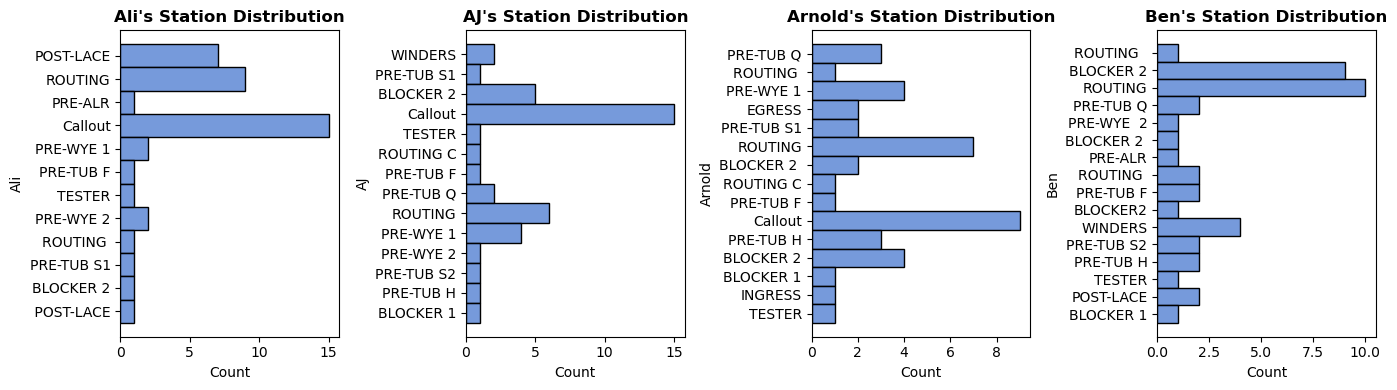

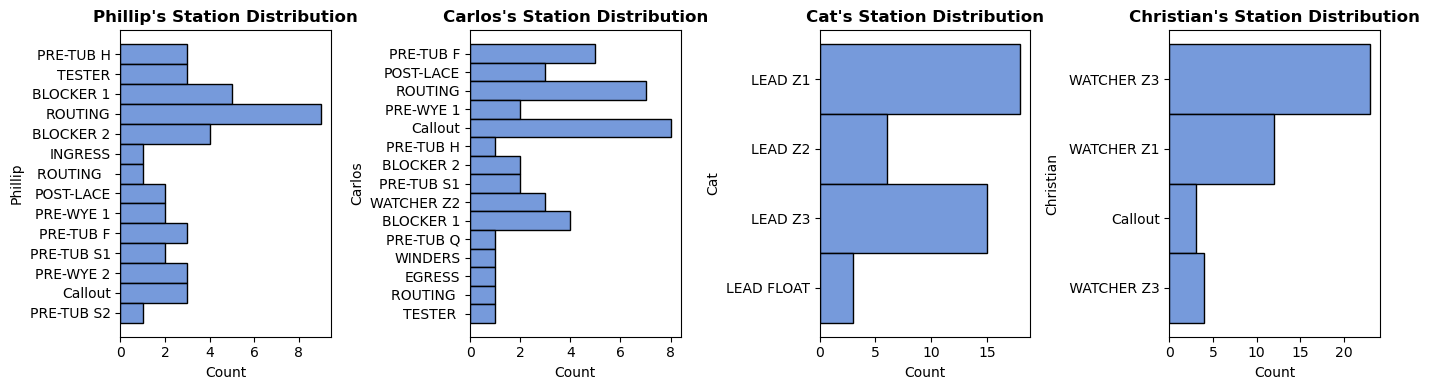

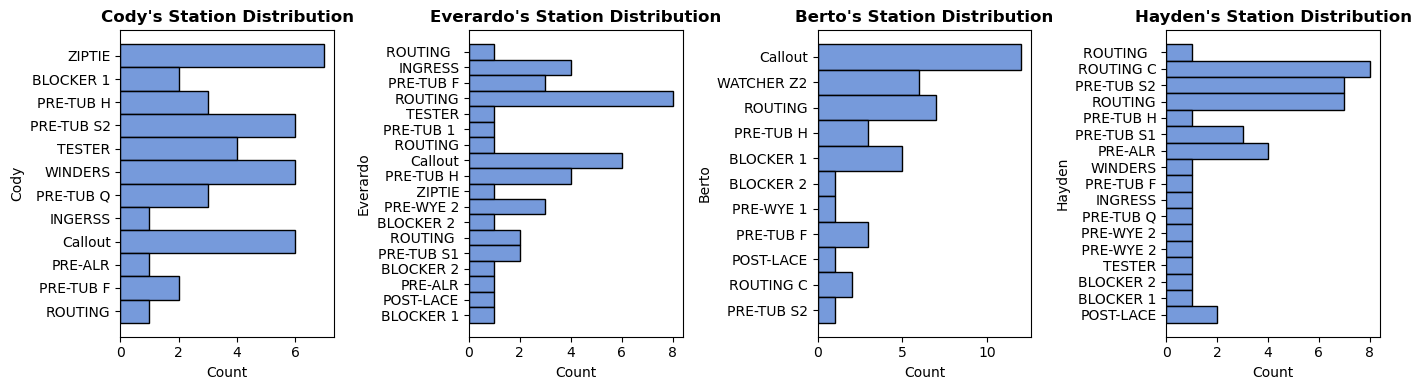

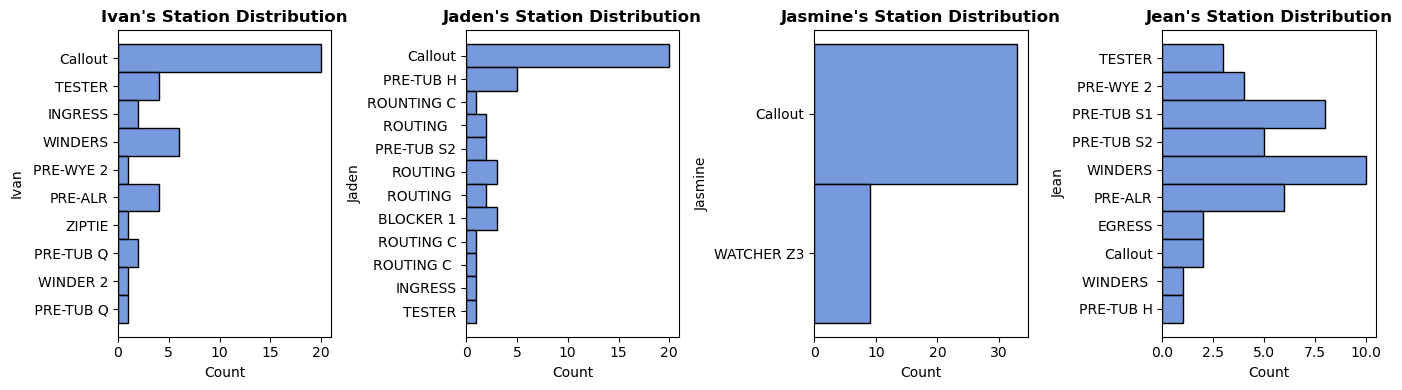

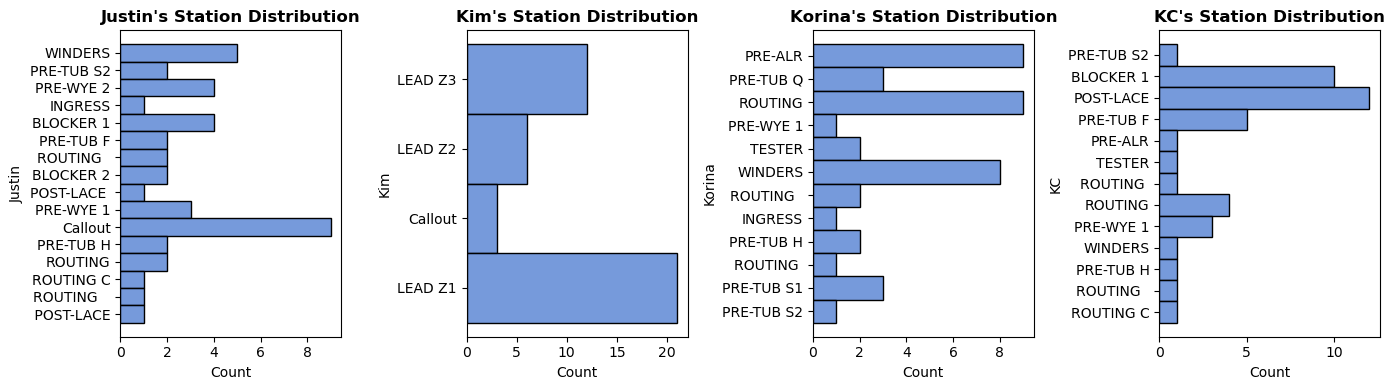

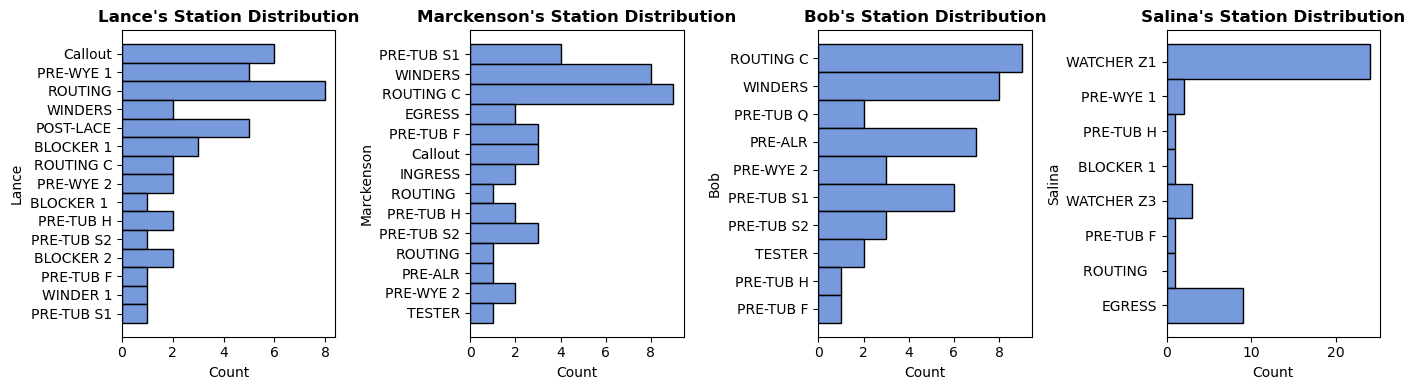

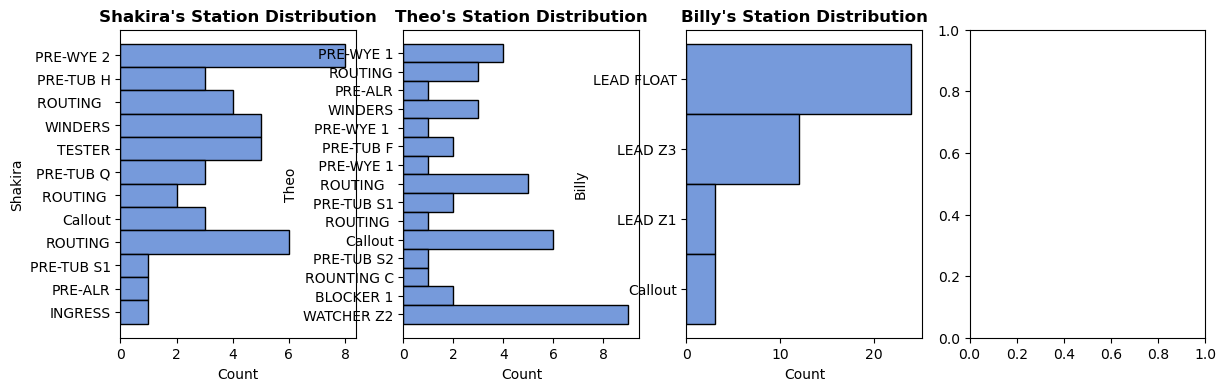

In [994]:
# Display Histogram per Name
col_ax = 0
row_limit = 25
counter = 0
fig, axes = plt.subplots(ncols=4, figsize=(14,4))
# Iterate to all features and display Historgram
for col in df.columns:
    # Set Historgram 
    ax=sns.histplot(data=df, y=col, ax=axes[col_ax])
    axes[col_ax].set_title(col+"'s Station Distribution", fontweight="bold")
    
    # Display every 2 cols and set new fig
    if col_ax == 3 and counter != row_limit:
        fig.tight_layout()
        fig, axes = plt.subplots(ncols=4, figsize=(14,4))
        col_ax = 0
        counter += 1
    else:
        col_ax += 1

In [995]:
# reload data
df2 = pd.read_excel(r'C:\Users\kdelfino\Documents\GitHub\PM2_Lineup_Dashboard\PM2-LINEUP-DASHBOARD\PM2 SCHEDULER.xlsx')

In [996]:
# drop last row 
df2.drop(index=27,inplace=True)

In [997]:
# Replace NaN with 'Callout'
df2.fillna('Callout',inplace=True)

In [998]:
# drop full roster
df2.drop(columns='Full Roster', inplace=True)

In [999]:
df2.head()

,AKA,05-01-24-A,05-01-24-B,05-01-24-C,05-02-24-A,05-02-24-B,05-02-24-C,05-03-24-A,05-03-24-B,05-03-24-C,...,05-18-24-C,05-23-24-A,05-23-24-B,05-23-24-C,05-24-24-A,05-24-24-B,05-24-24-C,05-25-24-A,05-25-24-B,05-25-24-C
0,Ali,POST-LACE,ROUTING,ROUTING,ROUTING,PRE-ALR,POST-LACE,Callout,Callout,Callout,...,Callout,POST-LACE,ROUTING,POST-LACE,ROUTING,BLOCKER 2,POST-LACE,ROUTING,POST-LACE,PRE-WYE 1
1,AJ,WINDERS,PRE-TUB S1,BLOCKER 2,Callout,Callout,Callout,Callout,Callout,Callout,...,PRE-WYE 1,Callout,Callout,Callout,PRE-TUB H,ROUTING,PRE-WYE 1,BLOCKER 1,PRE-WYE 1,ROUTING
2,Arnold,PRE-TUB Q,ROUTING,PRE-WYE 1,EGRESS,PRE-TUB S1,ROUTING,BLOCKER 2,ROUTING C,PRE-TUB F,...,PRE-TUB S1,PRE-WYE 1,ROUTING,BLOCKER 2,ROUTING,PRE-WYE 1,BLOCKER 2,BLOCKER 2,ROUTING,PRE-TUB Q
3,Ben,ROUTING,BLOCKER 2,ROUTING,BLOCKER 2,PRE-TUB Q,ROUTING,PRE-WYE 2,BLOCKER 2,PRE-ALR,...,ROUTING,PRE-TUB H,ROUTING,POST-LACE,BLOCKER 2,ROUTING,PRE-TUB Q,POST-LACE,BLOCKER 1,ROUTING
4,Phillip,PRE-TUB H,TESTER,BLOCKER 1,ROUTING,BLOCKER 2,INGRESS,BLOCKER 1,ROUTING,POST-LACE,...,Callout,TESTER,PRE-WYE 1,PRE-TUB S2,PRE-WYE 2,PRE-TUB H,TESTER,ROUTING,BLOCKER 2,PRE-TUB F


In [1000]:
df_new = pd.DataFrame(columns= ['AKA','Station','Date','Rotation'])

In [1001]:
list(df2.drop(columns='AKA').columns)[2].rsplit('-',1)[0]

'05-01-24'

In [1002]:
for i in range(len(df2)):
    for j in range(len(df2.drop(columns='AKA').columns)):    
        
        temp_df = [
            df2.iat[i,0], #AKA
            df2.iat[i,j+1], #Station
            list(df2.drop(columns='AKA').columns)[j].rsplit('-',1)[0], # Date
            list(df2.drop(columns='AKA').columns)[j].rsplit('-',1)[1] # Rotation
            
        ]
        df_new.loc[len(df_new.index)] = temp_df
       

df_new   
  

,AKA,Station,Date,Rotation
0,Ali,POST-LACE,05-01-24,A
1,Ali,ROUTING,05-01-24,B
2,Ali,ROUTING,05-01-24,C
3,Ali,ROUTING,05-02-24,A
4,Ali,PRE-ALR,05-02-24,B
...,...,...,...,...
1129,Billy,LEAD FLOAT,05-24-24,B
1130,Billy,LEAD FLOAT,05-24-24,C
1131,Billy,LEAD FLOAT,05-25-24,A
1132,Billy,LEAD FLOAT,05-25-24,B


In [1003]:
# Check for Naming Inconsistency
for col in df_new.columns:
    print(f"Checking {col}:\n{df_new[col].value_counts()}")
    # Separtor for readability 
    print("___________________________")

Checking AKA:
Ali           42
Jasmine       42
Theo          42
Shakira       42
Salina        42
Bob           42
Marckenson    42
Lance         42
KC            42
Korina        42
Kim           42
Justin        42
Jean          42
Jaden         42
AJ            42
Ivan          42
Hayden        42
Berto         42
Everardo      42
Cody          42
Christian     42
Cat           42
Carlos        42
Phillip       42
Ben           42
Arnold        42
Billy         42
Name: AKA, dtype: int64
___________________________
Checking Station:
Callout        185
ROUTING        107
WINDERS         70
BLOCKER 1       44
LEAD Z1         42
PRE-TUB H       41
LEAD Z3         39
PRE-ALR         38
PRE-TUB S1      38
PRE-TUB S2      37
PRE-TUB F       37
WATCHER Z1      36
ROUTING C       35
WATCHER Z3      35
POST-LACE       35
PRE-WYE 2       34
PRE-WYE 1       33
BLOCKER 2       32
TESTER          32
LEAD FLOAT      27
PRE-TUB Q       22
ROUTING         21
WATCHER Z2      18
EGRESS          16
I

In [1004]:
df_new['Station'] = df_new['Station'].apply(lambda x: x.strip())

In [1005]:
df_new['Station'].value_counts()

Callout       185
ROUTING       145
WINDERS        71
BLOCKER 1      45
LEAD Z1        42
PRE-TUB H      41
WATCHER Z3     39
LEAD Z3        39
POST-LACE      38
PRE-TUB S1     38
PRE-ALR        38
PRE-TUB S2     37
PRE-TUB F      37
BLOCKER 2      36
WATCHER Z1     36
ROUTING C      36
PRE-WYE 2      35
PRE-WYE 1      35
TESTER         33
LEAD FLOAT     27
PRE-TUB Q      23
WATCHER Z2     18
EGRESS         16
INGRESS        15
LEAD Z2        12
ZIPTIE          9
ROUNTING C      2
BLOCKER2        1
PRE-WYE  2      1
INGERSS         1
PRE-TUB 1       1
WINDER 2        1
WINDER 1        1
Name: Station, dtype: int64

In [1006]:
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('WINDER 1','WINDERS') )
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('WINDER 2','WINDERS') )
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('BLOCKER2','BLOCKER 2'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('PRE-WYE  2','PRE-WYE 2'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('PRE-TUB 1','PRE-TUB S1'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('ROUNTING C','ROUTING C'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('INGERS','INGRESS'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('INGRESSS','INGRESS'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('PRE-TUB S1','PRE-TUB S'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('PRE-TUB S2','PRE-TUB S'))

In [1007]:
df_new['Station'].value_counts().sort_values()

ZIPTIE          9
LEAD Z2        12
EGRESS         16
INGRESS        16
WATCHER Z2     18
PRE-TUB Q      23
LEAD FLOAT     27
TESTER         33
PRE-WYE 1      35
WATCHER Z1     36
PRE-WYE 2      36
BLOCKER 2      37
PRE-TUB F      37
POST-LACE      38
ROUTING C      38
PRE-ALR        38
LEAD Z3        39
WATCHER Z3     39
PRE-TUB H      41
LEAD Z1        42
BLOCKER 1      45
WINDERS        73
PRE-TUB S      76
ROUTING       145
Callout       185
Name: Station, dtype: int64

In [1008]:
df_new.groupby(['AKA','Station','Date','Rotation']).count()

Empty DataFrame
Columns: []
Index: [(AJ, BLOCKER 1, 05-25-24, A), (AJ, BLOCKER 2, 05-01-24, C), (AJ, BLOCKER 2, 05-11-24, B), (AJ, BLOCKER 2, 05-15-24, B), (AJ, BLOCKER 2, 05-16-24, B), (AJ, BLOCKER 2, 05-17-24, A), (AJ, Callout, 05-02-24, A), (AJ, Callout, 05-02-24, B), (AJ, Callout, 05-02-24, C), (AJ, Callout, 05-03-24, A), (AJ, Callout, 05-03-24, B), (AJ, Callout, 05-03-24, C), (AJ, Callout, 05-04-24, A), (AJ, Callout, 05-04-24, B), (AJ, Callout, 05-04-24, C), (AJ, Callout, 05-09-24, A), (AJ, Callout, 05-09-24, B), (AJ, Callout, 05-09-24, C), (AJ, Callout, 05-23-24, A), (AJ, Callout, 05-23-24, B), (AJ, Callout, 05-23-24, C), (AJ, PRE-TUB F, 05-10-24, C), (AJ, PRE-TUB H, 05-24-24, A), (AJ, PRE-TUB Q, 05-11-24, A), (AJ, PRE-TUB Q, 05-18-24, A), (AJ, PRE-TUB S, 05-01-24, B), (AJ, PRE-TUB S, 05-16-24, C), (AJ, PRE-WYE 1, 05-15-24, A), (AJ, PRE-WYE 1, 05-18-24, C), (AJ, PRE-WYE 1, 05-24-24, C), (AJ, PRE-WYE 1, 05-25-24, B), (AJ, PRE-WYE 2, 05-16-24, A), (AJ, ROUTING, 05-11-24, C), (AJ, ROUTING, 05-15-24, C), (AJ, ROUTING, 05-17-24, B), (AJ, ROUTING, 05-18-240, B), (AJ, ROUTING, 05-24-24, B), (AJ, ROUTING, 05-25-24, C), (AJ, ROUTING C, 05-10-24, B), (AJ, TESTER, 05-10-24, A), (AJ, WINDERS, 05-01-24, A), (AJ, WINDERS, 05-17-24, C), (Ali, BLOCKER 2, 05-24-24, B), (Ali, Callout, 05-03-24, A), (Ali, Callout, 05-03-24, B), (Ali, Callout, 05-03-24, C), (Ali, Callout, 05-04-24, A), (Ali, Callout, 05-04-24, B), (Ali, Callout, 05-04-24, C), (Ali, Callout, 05-16-24, A), (Ali, Callout, 05-16-24, B), (Ali, Callout, 05-16-24, C), (Ali, Callout, 05-17-24, A), (Ali, Callout, 05-17-24, B), (Ali, Callout, 05-17-24, C), (Ali, Callout, 05-18-24, A), (Ali, Callout, 05-18-24, C), (Ali, Callout, 05-18-240, B), (Ali, POST-LACE, 05-01-24, A), (Ali, POST-LACE, 05-02-24, C), (Ali, POST-LACE, 05-10-24, A), (Ali, POST-LACE, 05-11-24, C), (Ali, POST-LACE, 05-23-24, A), (Ali, POST-LACE, 05-23-24, C), (Ali, POST-LACE, 05-24-24, C), (Ali, POST-LACE, 05-25-24, B), (Ali, PRE-ALR, 05-02-24, B), (Ali, PRE-TUB F, 05-09-24, C), (Ali, PRE-TUB S, 05-15-24, A), (Ali, PRE-WYE 1, 05-09-24, A), (Ali, PRE-WYE 1, 05-25-24, C), (Ali, PRE-WYE 2, 05-11-24, A), (Ali, PRE-WYE 2, 05-15-24, B), (Ali, ROUTING, 05-01-24, B), (Ali, ROUTING, 05-01-24, C), (Ali, ROUTING, 05-02-24, A), (Ali, ROUTING, 05-09-24, B), (Ali, ROUTING, 05-10-24, B), (Ali, ROUTING, 05-11-24, B), (Ali, ROUTING, 05-15-24, C), (Ali, ROUTING, 05-23-24, B), (Ali, ROUTING, 05-24-24, A), (Ali, ROUTING, 05-25-24, A), (Ali, TESTER, 05-10-24, C), (Arnold, BLOCKER 1, 05-09-24, C), (Arnold, BLOCKER 2, 05-03-24, A), (Arnold, BLOCKER 2, 05-09-24, B), (Arnold, BLOCKER 2, 05-18-24, A), (Arnold, BLOCKER 2, 05-23-24, C), (Arnold, BLOCKER 2, 05-24-24, C), (Arnold, BLOCKER 2, 05-25-24, A), (Arnold, Callout, 05-04-24, A), (Arnold, Callout, 05-04-24, B), (Arnold, Callout, 05-04-24, C), (Arnold, Callout, 05-11-24, A), (Arnold, Callout, 05-11-24, B), (Arnold, Callout, 05-11-24, C), (Arnold, Callout, 05-15-24, A), (Arnold, Callout, 05-15-24, B), (Arnold, Callout, 05-15-24, C), ...]

[1134 rows x 0 columns]

In [1018]:

df_new[(df_new['AKA']==aka)&(df_new['Station']!='Callout')]

,AKA,Station,Date,Rotation
714,Kim,LEAD Z3,05-01-24,A
715,Kim,LEAD Z3,05-01-24,B
716,Kim,LEAD Z3,05-01-24,C
717,Kim,LEAD Z2,05-02-24,A
718,Kim,LEAD Z2,05-02-24,B
719,Kim,LEAD Z2,05-02-24,C
720,Kim,LEAD Z3,05-03-24,A
721,Kim,LEAD Z3,05-03-24,B
722,Kim,LEAD Z3,05-03-24,C
726,Kim,LEAD Z1,05-09-24,A


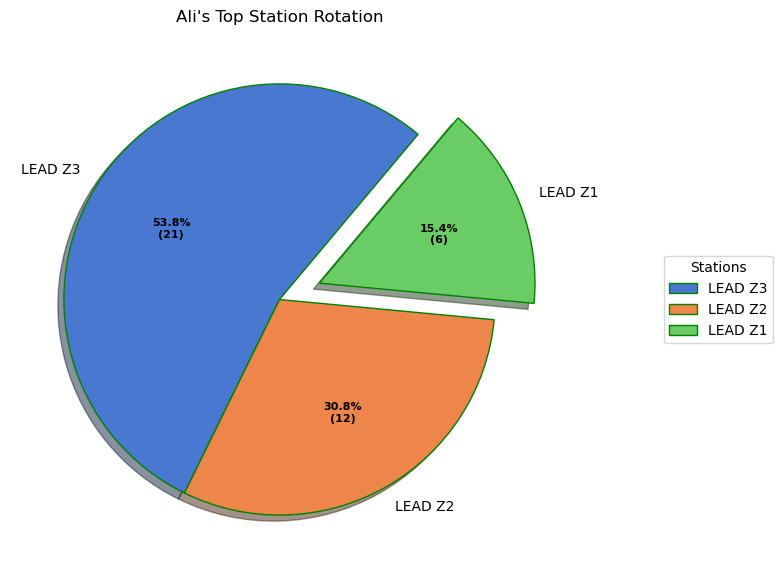

In [1023]:
import random

# Get name
aka = "kim".title()

data_per_aka = df_new[(df_new['AKA']==aka)&(df_new['Station']!='Callout')]
# Creating dataset
Station = data_per_aka['Station'].unique()
 
data = data_per_aka['Station'].value_counts()
 
 
# # Creating explode data
# explode = (0.1,0.2,0.0,0.0,0.2,0.1,0.1,0.2,0.1)
explode = tuple(round(random.uniform(0.0,0.3),1) for i in range(len(Station)))
 
# Creating color parameters
# colors = ("orange", "cyan", "brown",
#           "grey", "indigo", "beige")
 
# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}
 
# Creating autocpt arguments
 
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
 
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  explode=explode,
                                  labels=Station,
                                  shadow=True,
                                #   colors=colors,
                                  startangle=50,
                                  wedgeprops=wp,
                                  textprops=dict(color="Black"))
 
# Adding legend
ax.legend(wedges, Station,
          title="Stations",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))
 
plt.setp(autotexts, size=8, weight="bold")
ax.set_title(f"{name_aka}'s Top Station Rotation")
 
# show plot
plt.show()

,AKA,Station,Date,Rotation
0,Ali,POST-LACE,05-01-24,A
1,Ali,ROUTING,05-01-24,B
2,Ali,ROUTING,05-01-24,C
3,Ali,ROUTING,05-02-24,A
4,Ali,PRE-ALR,05-02-24,B
5,Ali,POST-LACE,05-02-24,C
12,Ali,PRE-WYE 1,05-09-24,A
13,Ali,ROUTING,05-09-24,B
14,Ali,PRE-TUB F,05-09-24,C
15,Ali,POST-LACE,05-10-24,A
